# Cap. 8 - Scipy



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Integração e EDOs

O submódulo `scipy.integrate` implementa funções para o cálculo de integrais e EDOs.

### Integrais

Vamos começar com integrais definidas de funções de uma variável, definidas em `scipy.integrate.quad`. Essas funções são baseadas no famoso pacote ["QUADPACK"](https://en.wikipedia.org/wiki/QUADPACK) escrito em função.



In [ ]:
from scipy.integrate import quad

Por exemplo, para calcular
$$
\int_1^4 x^{-2} dx = 3/4\,,
$$
podemos fazer

In [ ]:
f = lambda x: 1/x**2
#função, limite inferior, limite superior
quad(f,1,4)

(0.7500000000000002, 1.913234548258995e-09)

O resultado é uma tupla contendo o valor e uma estimativa do erro absoluto.

Para fazer integrais indefinidas, usamos `np.inf`.

Por exemplo,

$$
\int_0^\infty e^{-x^2} dx = \frac{\sqrt{\pi}}{2}
$$

ou

$$
\int_{-\infty}^\infty e^{-x^2} dx = \sqrt{\pi}
$$

podem ser implementadas via:

In [ ]:
quad(lambda x: np.exp(-x**2), 0, np.inf), 0.5*np.sqrt(np.pi)

((0.8862269254527579, 7.101318390472462e-09), 0.8862269254527579)

In [ ]:
quad(lambda x: np.exp(-x**2), -np.inf, np.inf), np.sqrt(np.pi)

((1.7724538509055159, 1.4202636780944923e-08), 1.7724538509055159)

Naturalmente, podemos usar qualquer função do Python. Por exemplo,

In [ ]:
def g(x):
    if abs(x) < 0.5:
        return -x
    return x-np.sign(x)

In [ ]:
quad(g,-0.6,0.8)

(-0.06000000000000002, 6.661338147750941e-17)

Em casos em que a função apresenta singularidades, podemos ter problemas. Por exemplo,

$$
f(x) = \frac{\sin x}{x}
$$

em $x=0$.

Nesses casos, a função pode falhar em convergir.

In [ ]:
sinc = lambda x: np.sin(x)/x

In [ ]:
quad(sinc, -2, 2)

<ipython-input-8-4911c68e339f>:1: RuntimeWarning: invalid value encountered in scalar divide
  sinc = lambda x: np.sin(x)/x
<ipython-input-9-ee0bd075e4b9>:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad(sinc, -2, 2)


(nan, nan)

Uma maneira de contornar esse problema é passar os pontos de descontinuidades:

In [ ]:
quad(sinc, -2, 2, points=[0])

(3.210825953605389, 3.5647329017567276e-14)

Em certas aplicações pode ser preciso ajustar o erro da estimativa. Para isso, podemos modificar as tolerâncias `epsrel` e `epsabs`, cujos valores são $1.49\times 10^{-8}$ por padrão.

Considere, por exemplo, uma função que oscila muito rapidamente:

$$
f(x) = e^{-|x|} \sin^2 x^2
$$

In [ ]:
f = lambda x: np.sin(x**2)**2 * np.exp(-np.abs(x))

In [ ]:
quad(f, -1, 2) #padrão

(0.29551455505239044, 4.449763316745447e-10)

In [ ]:
quad(f, -1, 2, epsabs=0.1)

(0.29551455828969975, 0.001529571827909423)

Vale notar que as tolerâncias funcionam com um limite superior para incerteza da estimativa, a qual costuma ser bem menor.

Podemos considerar também o caso de uma função que tem mais de um argumento, além do $x$.

Por exemplo,

$$
I_{n,m} = \int_{-\pi/2}^{+\pi/2} \sin^n x \cos^m x dx
$$

In [ ]:
def f(x, n, m):
    return np.sin(x)**n * np.cos(x)**m

In [ ]:
#usamos o parâmetro args para passar os demais argumentos
quad(f, -np.pi/2, np.pi/2, args=(2, 0))

(1.5707963267948966, 1.743934249004316e-14)

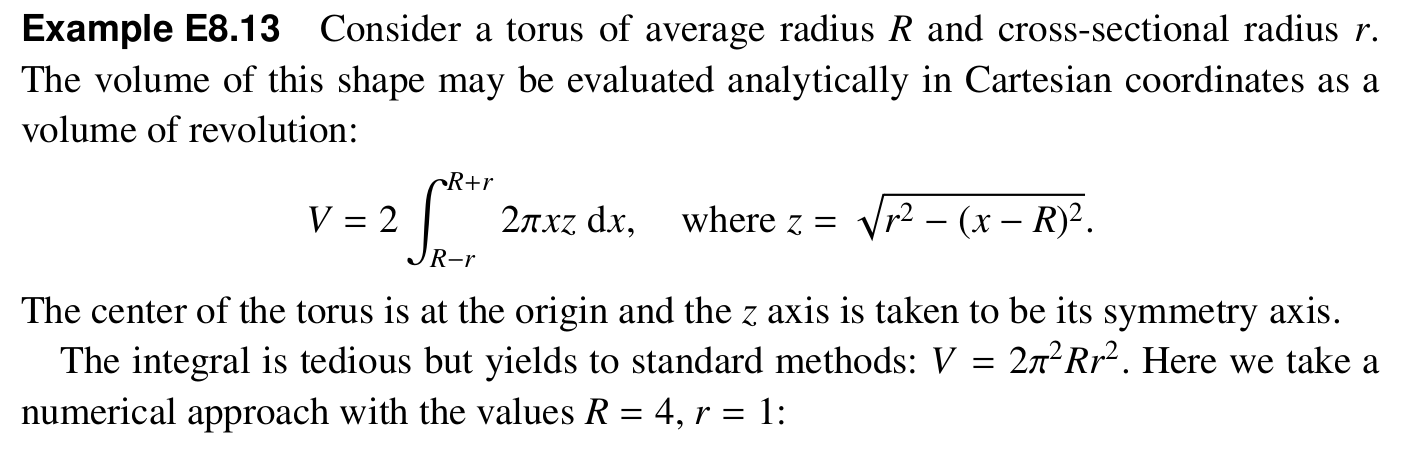

In [ ]:
def integrando(x, R, r):
    z = np.sqrt(r**2 - (x-R)**2)
    return 4 * np.pi * x * z


In [ ]:
R, r = 4, 1
quad(integrando, R-r, R+r, args=(R, r))

(78.95683520871498, 5.0277279228794214e-08)

In [ ]:
# valor exato
2 * np.pi**2 * R * r**2

78.95683520871486

### Integrais de duas ou mais variáveis

As funções `dblquad`, `tplquad` e `nquad` do `scipy.integrate` calculam integrais duplas, triplas e $n$ variáveis.

Por exemplo, `dblquad`calcula a integral

$$
\int_a^b\int_{g(x)}^{h(x)} f(x,y) dy dx
$$

Por exemplo,

$$
\int_1^4\int_{0}^{2} x^2 y dy dx
$$



In [ ]:
from scipy.integrate import dblquad, tplquad

In [ ]:
f = lambda y, x: x**2 * y
a, b = 1, 4

#note que dever ser uma função
gfun = lambda x: 0
hfun = lambda x: 2

In [ ]:
dblquad(f, a, b, gfun, hfun)

(42.00000000000001, 4.662936703425658e-13)

In [ ]:
?dblquad

In [ ]:
#em uma linha
dblquad(lambda y, x: x**2 * y, 1, 4, lambda x: 0, lambda x: 2)

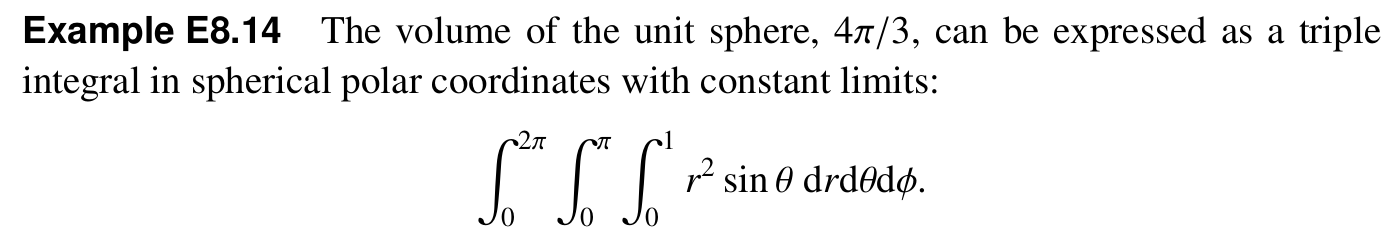

In [ ]:
?tplquad

In [ ]:
tplquad(lambda phi, theta, r: r**2 * np.sin(theta),
        0, 1,
        0, np.pi,
        0, 2*np.pi)

(4.1887902047863905, 1.389095079694993e-13)

In [ ]:
#exato
4*np.pi/3.

4.1887902047863905

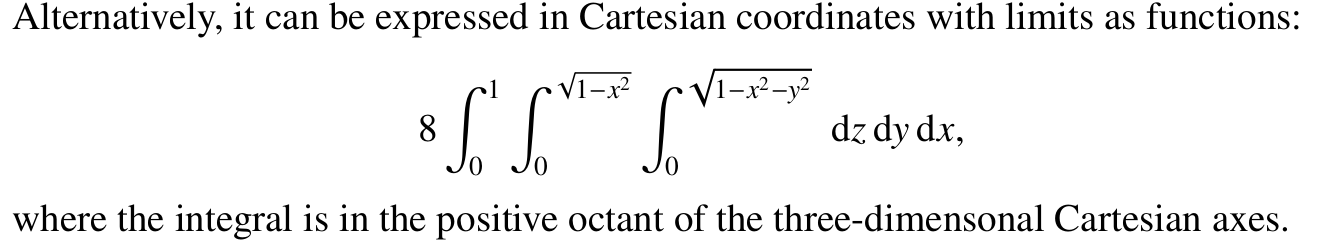

In [ ]:
tplquad(lambda z, y, x: 8,
        0, 1,
        lambda x: 0, lambda x: np.sqrt(1 - x**2),
        lambda x,y: 0, lambda x,y: np.sqrt(1 - x**2 - y**2))

(4.188790204786391, 7.067022522733168e-10)

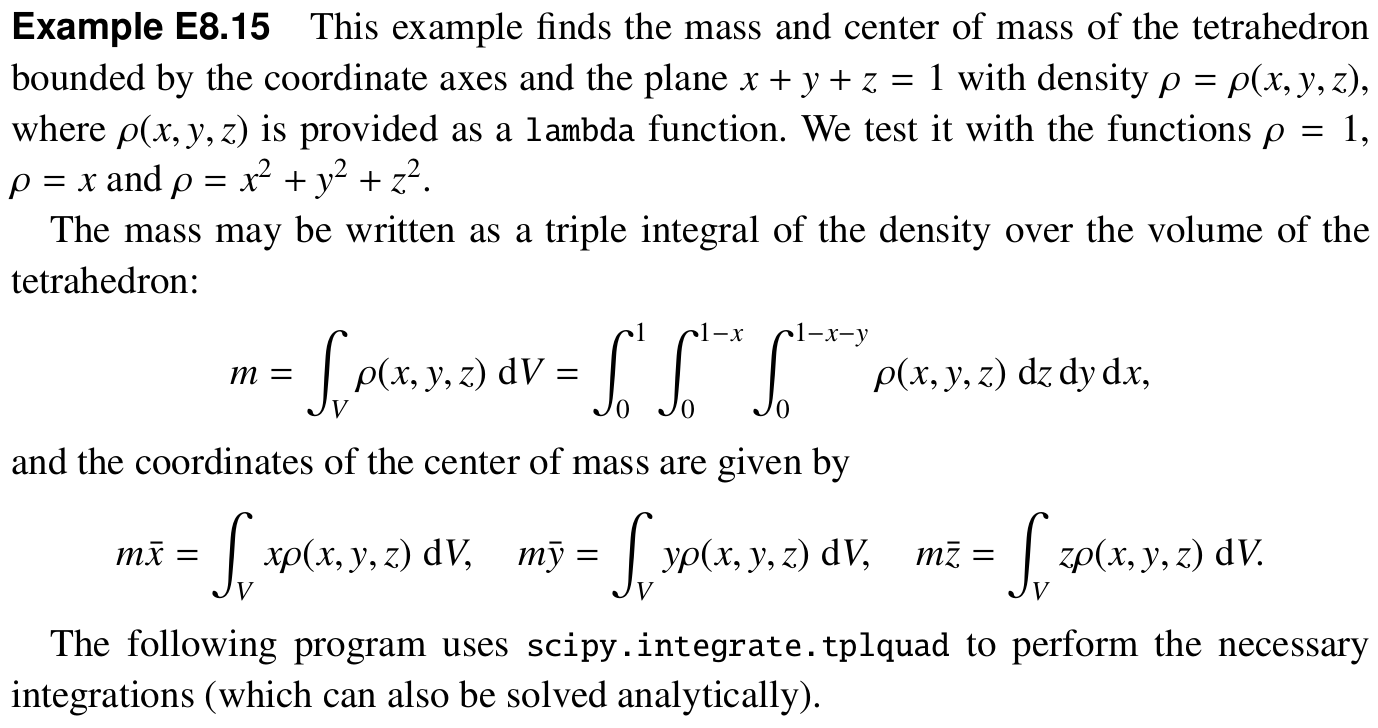

In [ ]:
#limites de integração
a, b = 0, 1

gfun, hfun = lambda x: 0, lambda x: 1 - x
qfun, rfun = lambda x, y: 0, lambda x, y: 1 - x - y

lims = (a, b, gfun, hfun, qfun, rfun)

# diferentes densidades
rhos = [lambda x, y, z: 1,
        lambda x, y, z: x,
        lambda x, y, z: x**2 + y**2 + z**2]

In [ ]:
for rho in rhos:
    #massa
    m, _ = tplquad(rho, *lims)

    mxbar, _ = tplquad(lambda x, y, z: x * rho(x,y,z), *lims)
    mybar, _ = tplquad(lambda x, y, z: y * rho(x,y,z), *lims)
    mzbar, _ = tplquad(lambda x, y, z: z * rho(x,y,z), *lims)
    #centro de massa
    xbar, ybar, zbar = mxbar / m, mybar / m, mzbar / m

    print(f'massa = {m:.3f}, r_cm = ({xbar:.3f}, {ybar:.3f}, {zbar:.3f})')

massa = 0.167, r_cm = (0.250, 0.250, 0.250)
massa = 0.042, r_cm = (0.400, 0.200, 0.200)
massa = 0.050, r_cm = (0.278, 0.278, 0.278)


### Equações diferenciais ordinárias

As funções `scipy.integrate.odeint` e `scipy.integrate.solve_ivp` resolvem EDOs.

- `solve_ivp` foi introduzida mais recentemente;
- `odeint` é mais antiga e vai ser depreciada.

`solve_ivp` resolve EDOs de primeira ordem. No caso de ordens superiores, devemos decompor num sistema de EDOs de primeira ordem.

O caso mais simples envolve resolver

$$
\frac{dy}{dt} = f(t,y)
$$

`solve_ivp` toma 3 argumentos: $\frac{dy}{dt}$, (tempo inicial, tempo final), condições iniciais.

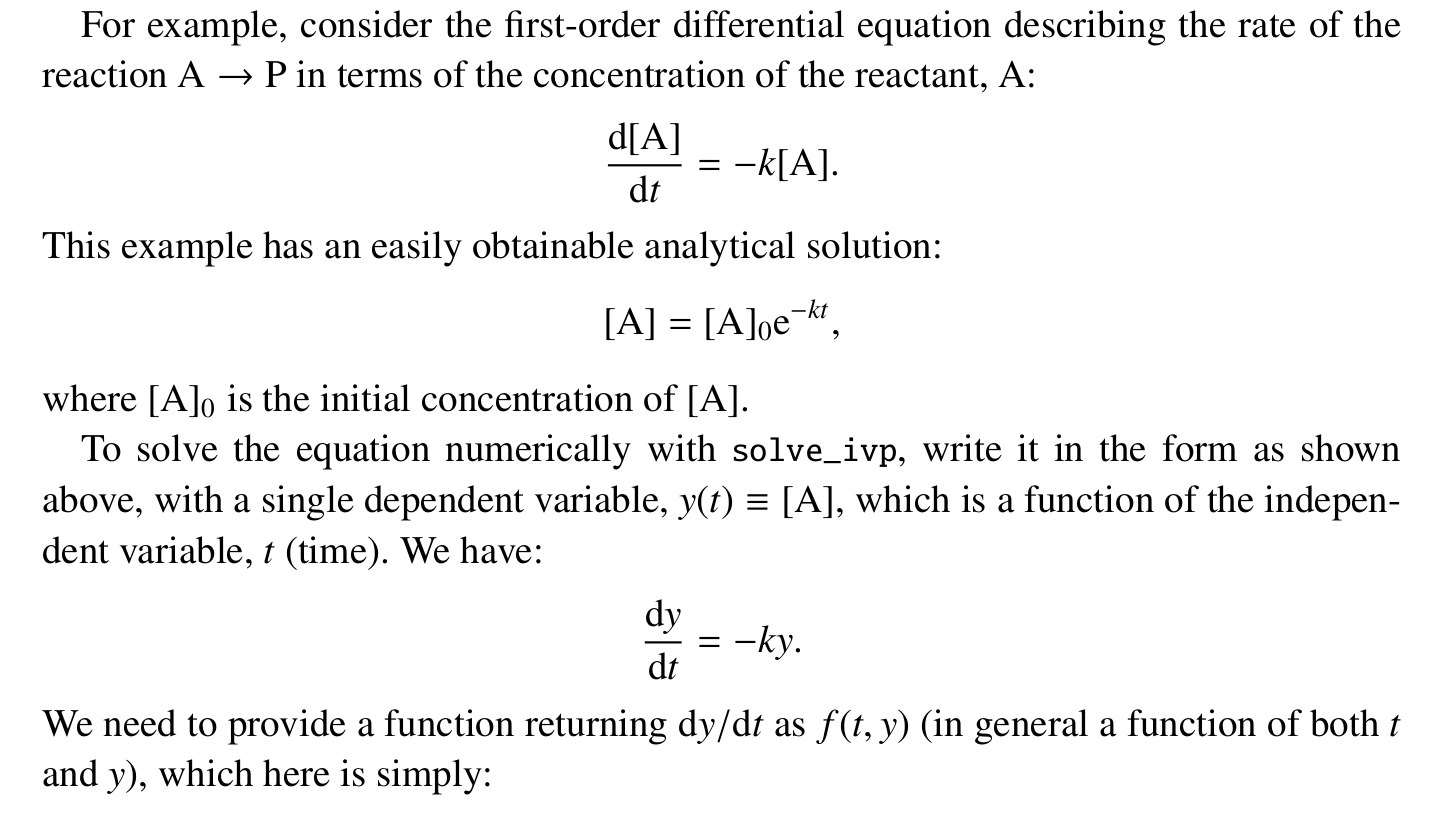

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
# taxa de reação
k = 0.2
# condição inicial
y0 = 100

# tempos inicial e final
t0, tf = 0, 20

def dydt(t, y):
    return -k * y

In [ ]:
soln = solve_ivp(dydt , (t0 , tf), [y0])

In [ ]:
soln

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.380e-01  1.518e+00  6.112e+00  1.049e+01
             1.489e+01  1.928e+01  2.000e+01]
        y: [[ 1.000e+02  9.728e+01  7.382e+01  2.947e+01  1.227e+01
              5.098e+00  2.118e+00  1.835e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0

In [ ]:
soln.t

array([ 0.        ,  0.13797324,  1.51770566,  6.11233264, 10.4942851 ,
       14.88942184, 19.28378064, 20.        ])

In [ ]:
t, y = soln.t, soln.y[0]

Text(0, 0.5, 'Concentração de reagente, $A(t)$')

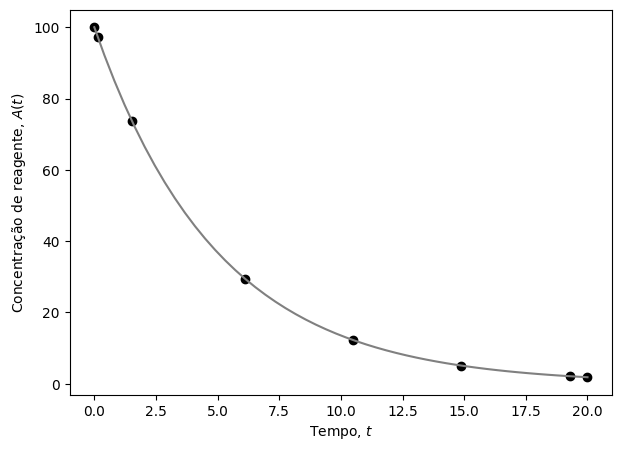

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(t, y, 'o', color ='k', label =r'Solução numérica')

t_ = np.linspace(0,20)
ax.plot(t_, y0 * np.exp(-k*t_), color ='gray', label ='Solução exata')

ax.set_xlabel("Tempo, $t$")
ax.set_ylabel("Concentração de reagente, $A(t)$")

No que os tempos da solução numérica não estão uniformemente distribuídos. Mas isso pode ser modificado passando o parâmetro `t_eval`:

In [ ]:
soln = solve_ivp(dydt , (t0 , tf), [y0], t_eval = t_)
t, y = soln.t, soln.y[0]

In [ ]:
y, t

(array([100.        ,  92.1610102 ,  84.9365194 ,  78.2784321 ,
         72.14178456,  66.47957308,  61.25698937,  56.44394008,
         52.01135837,  47.9312039 ,  44.17646287,  40.72114796,
         37.54029837,  34.60997979,  31.90728445,  29.41033322,
         27.10317785,  24.97510292,  23.01370539,  21.20704506,
         19.54364458,  18.01248944,  16.60302796,  15.3051713 ,
         14.10929346,  13.00623128,  11.98737327,  11.04669769,
         10.17921375,   9.37981341,   8.64358008,   7.96578856,
          7.34190505,   6.76758718,   6.23868398,   5.75123592,
          5.30147484,   4.88595877,   4.50245864,   4.14886237,
          3.82306644,   3.52304687,   3.24685922,   2.9926386 ,
          2.75859965,   2.54303657,   2.3443231 ,   2.16091251,
          1.99153648,   1.83542088]),
 array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
         2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
         4.08163265,  4.48979592,  4.89795918,  

Text(0, 0.5, 'Concentração de reagente, $A(t)$')

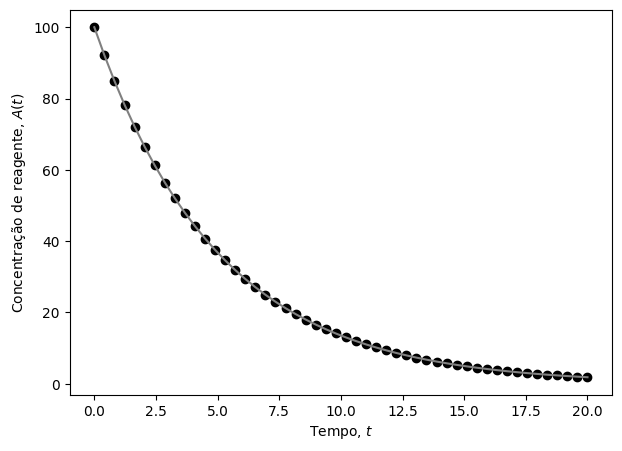

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(t, y, 'o', color ='k', label =r'Solução numérica')

t_ = np.linspace(0,20)
ax.plot(t_, y0 * np.exp(-k*t_), color ='gray', label ='Solução exata')

ax.set_xlabel("Tempo, $t$")
ax.set_ylabel("Concentração de reagente, $A(t)$")

O valor da taxa de reação $k$ também pode ser passado usando o parâmetro `args`:

In [ ]:
def dydt(t, y, k):
    return -k * y #* np.sin(t) * t * np.exp(-t)

Text(0, 0.5, 'Concentração de reagente, $A(t)$')

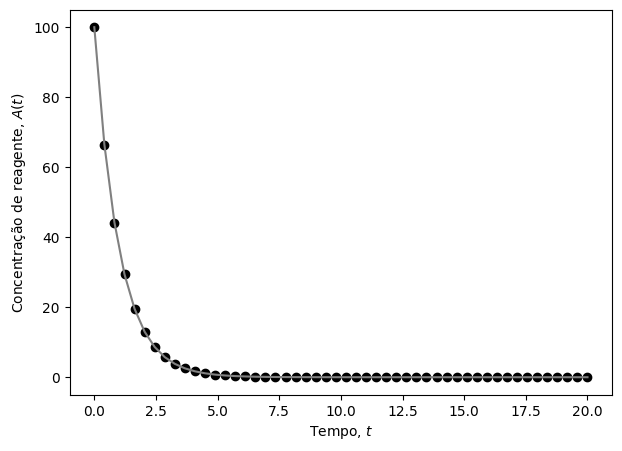

In [ ]:
k = 1
soln = solve_ivp(dydt , (t0 , tf), [y0], args=[k], t_eval=t_)
t, y = soln.t, soln.y[0]

f, ax = plt.subplots(figsize=(7,5))

ax.plot(t, y, 'o', color ='k', label =r'Solução numérica')

t_ = np.linspace(0,20)
ax.plot(t_, y0 * np.exp(-k*t_), color ='gray', label ='Solução exata')

ax.set_xlabel("Tempo, $t$")
ax.set_ylabel("Concentração de reagente, $A(t)$")

Text(0, 0.5, 'Concentração de reagente, $A(t)$')

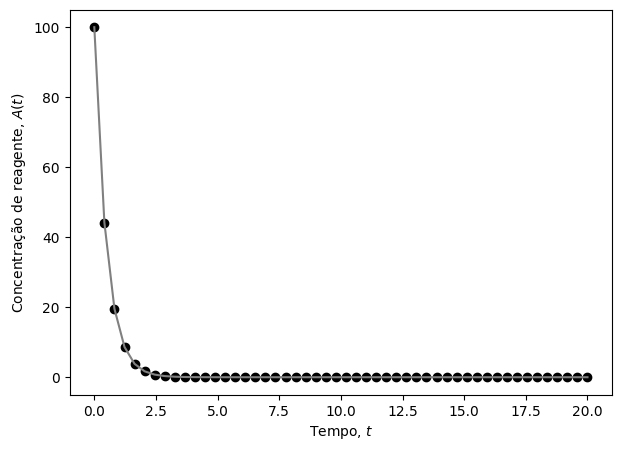

In [ ]:
k = 2
soln = solve_ivp(dydt , (t0 , tf), [y0], args=[k], t_eval=t_)
t, y = soln.t, soln.y[0]

f, ax = plt.subplots(figsize=(7,5))

ax.plot(t, y, 'o', color ='k', label =r'Solução numérica')

t_ = np.linspace(0,20)
ax.plot(t_, y0 * np.exp(-k*t_), color ='gray', label ='Solução exata')

ax.set_xlabel("Tempo, $t$")
ax.set_ylabel("Concentração de reagente, $A(t)$")

In [ ]:
from ipywidgets import interact

In [ ]:
@interact(k=(0.1,10,0.1))
def plot(k=0.1):
    t_ = np.linspace(t0,tf)
    soln = solve_ivp(dydt , (t0 , tf), [y0], args=[k], t_eval=t_)
    t, y = soln.t, soln.y[0]

    f, ax = plt.subplots(figsize=(7,5))

    ax.plot(t, y, 'o', color ='k', label =r'Solução numérica')

    t_ = np.linspace(0,20)
    ax.plot(t_, y0 * np.exp(-k*t_), color ='gray', label ='Solução exata')

    ax.set_xlabel("Tempo, $t$")
    ax.set_ylabel("Concentração de reagente, $A(t)$")
    plt.close(f)

    return f

interactive(children=(FloatSlider(value=0.1, description='k', max=10.0, min=0.1), Output()), _dom_classes=('wi…

**Sistema de equações acoplados**

`solve_ivp` também pode resolver sistemas de EDOs de primeira ordem:

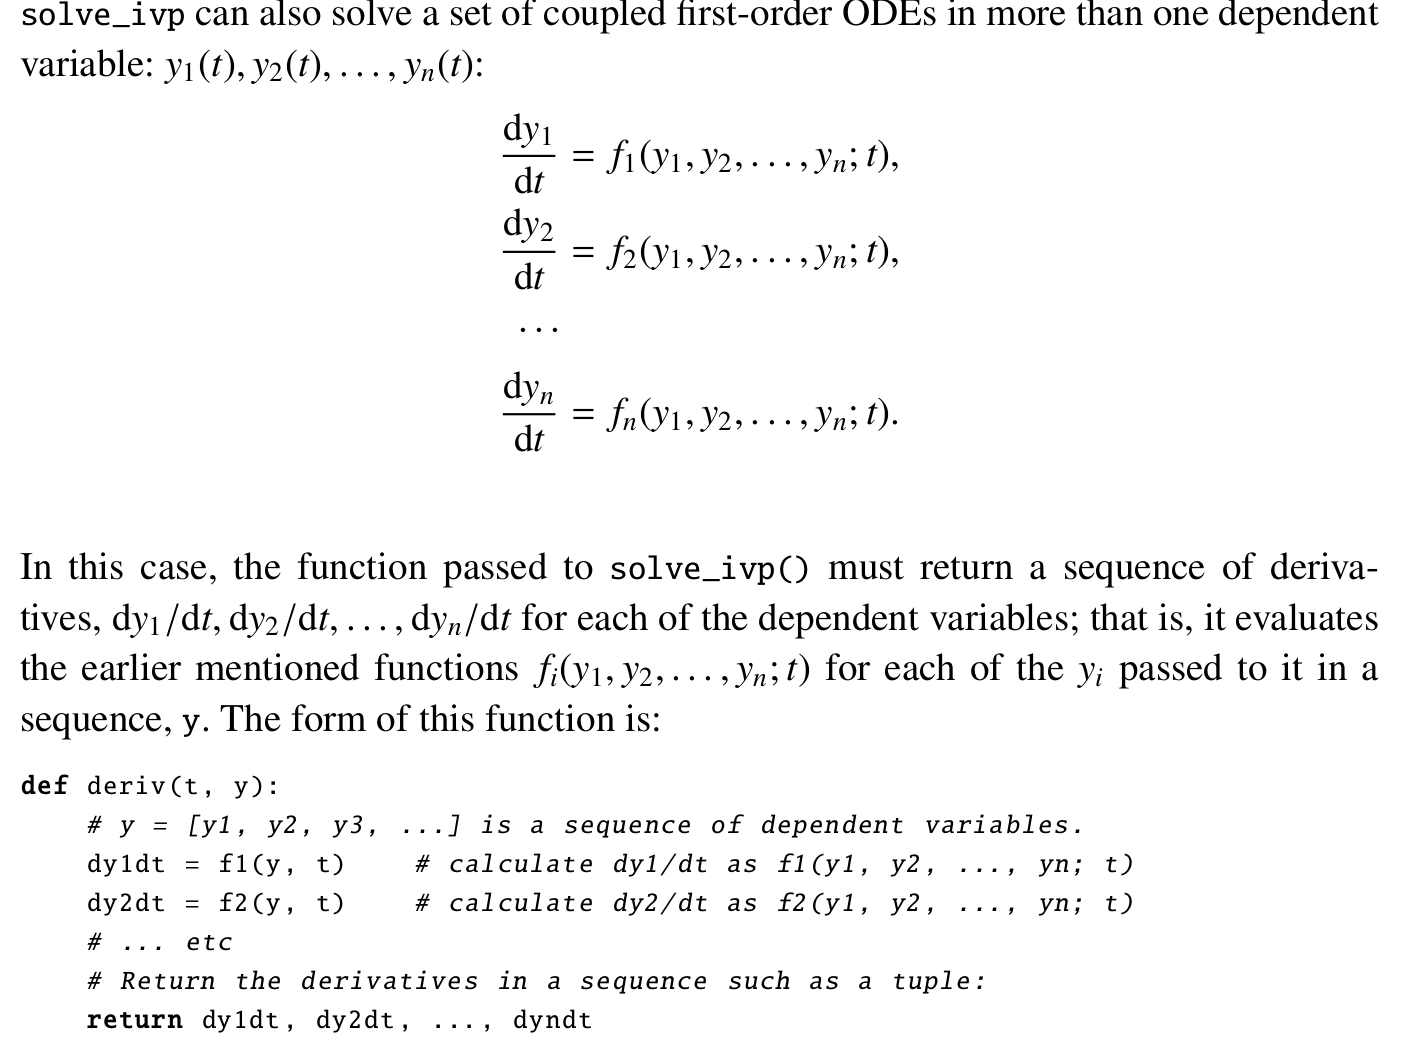

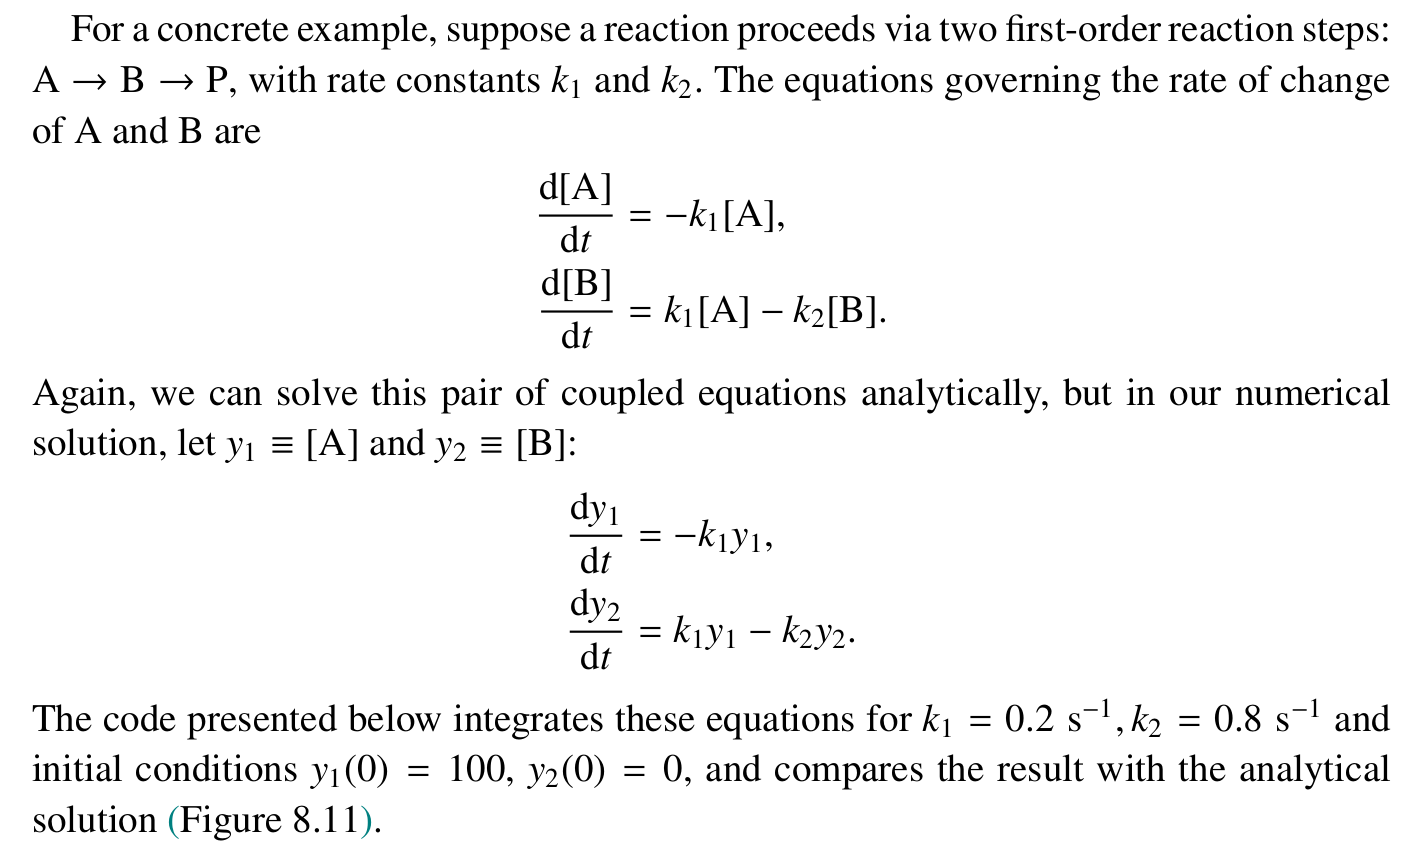

In [ ]:
# taxas de reação
k1 , k2 = 0.2, 0.8
# Condições iniciais: y1 , y2: [A](t=0) = 100, [B](t=0) = 0.
A0, B0 = 100, 0
y0 = A0, B0

# tempos inicial e final
t0, tf = 0, 20

In [ ]:
def dydt(t, y, k1 , k2):

    #y=[y1,y2]
    y1, y2 = y

    dy1dt = -k1 * y1
    dy2dt =  k1 * y1 - k2 * y2

    return dy1dt, dy2dt

In [ ]:
#dense_output=True assume que a solução é contínua
soln = solve_ivp(dydt, (t0, tf), y0, dense_output=True, args=(k1, k2))

In [ ]:
soln

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  5.000e-05 ...  1.965e+01  2.000e+01]
        y: [[ 1.000e+02  1.000e+02 ...  1.965e+00  1.832e+00]
            [ 0.000e+00  1.000e-03 ...  6.534e-01  6.097e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7df4573279d0>
 t_events: None
 y_events: None
     nfev: 92
     njev: 0
      nlu: 0

In [ ]:
soln.sol([0.,0.2])

array([[100.        ,  96.07894363],
       [  0.        ,   3.6216471 ]])

In [ ]:
t = np.linspace(t0 , tf , 100)
A, B = soln.sol(t)

#A+B+P=100
P = A0 - A - B

In [ ]:
#solução exata
Aexact = A0 * np.exp(-k1*t)
Bexact = A0 * k1 /(k2 -k1) * (np.exp(-k1*t) - np.exp(-k2*t))
Pexact = A0 - Aexact - Bexact

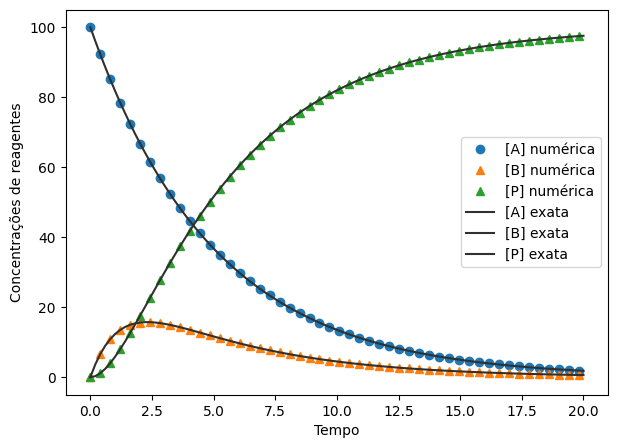

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(t, A, 'o', label='[A] numérica', markevery=2)
ax.plot(t, B, '^', label='[B] numérica', markevery=2)
ax.plot(t, P, '^', label='[P] numérica', markevery=2)

ax.plot(t, Aexact, '-', label='[A] exata', color='#303030')
ax.plot(t, Bexact, '-', label='[B] exata', color='#303030')
ax.plot(t, Pexact, '-', label='[P] exata', color='#303030')

ax.set_xlabel("Tempo")
ax.set_ylabel("Concentrações de reagentes")

ax.legend()

**Uma EDO de segunda ordem**

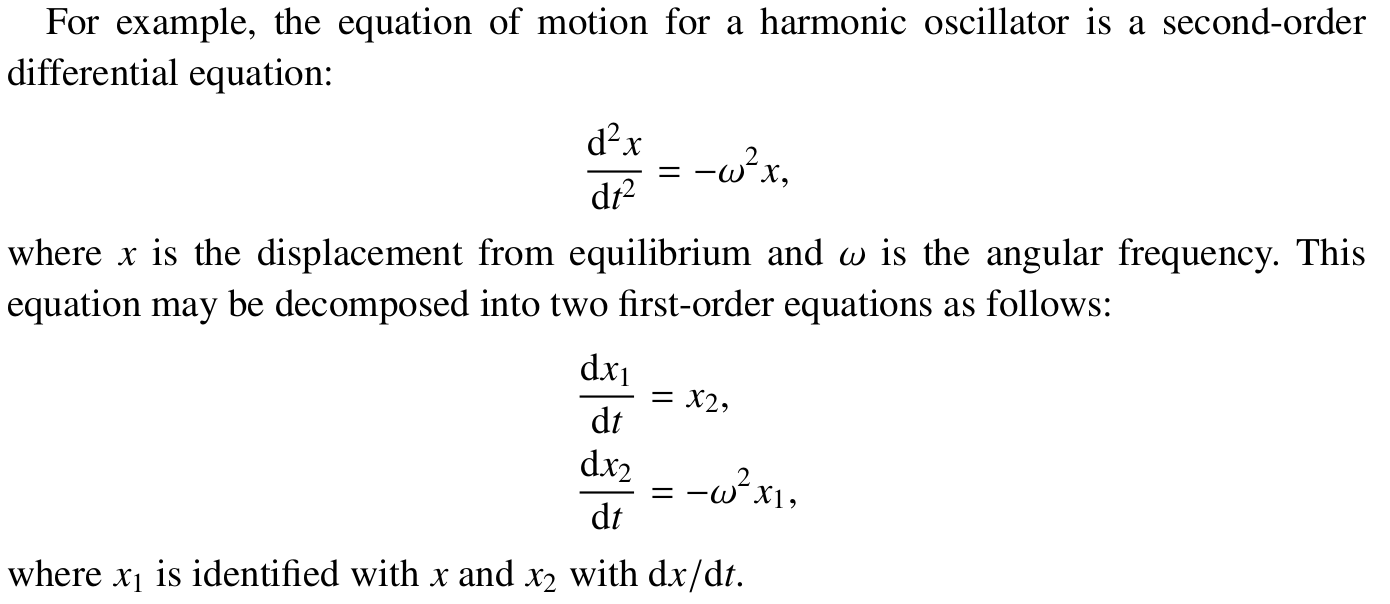

In [ ]:
omega = 0.9
A, v0 = 3, 0

x0 = A, v0 #par x(t), v(t) em t=0

# tempos
t0, tf = 0, 20
t = np.linspace(t0 , tf , 100)

In [ ]:
def dxdt(t, x):
    x1, x2 = x
    dx1dt = x2
    dx2dt = -omega **2 * x1

    return dx1dt , dx2dt

In [ ]:
soln = solve_ivp(dxdt, (t0 , tf), x0, dense_output=True)

x1, x2 = soln.sol(t)

Text(0, 0.5, 'Deslocamento, $x(t)$')

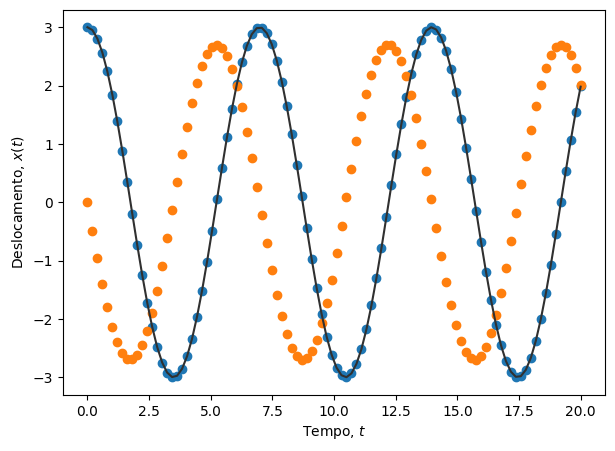

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(t, x1 , 'o', label='Solução numérica')
ax.plot(t, x2 , 'o', label='Solução numérica')

ax.plot(t, A * np.cos(omega * t), color='#303030', label ='Solução exata')

ax.set_xlabel("Tempo, $t$")
ax.set_ylabel("Deslocamento, $x(t)$")

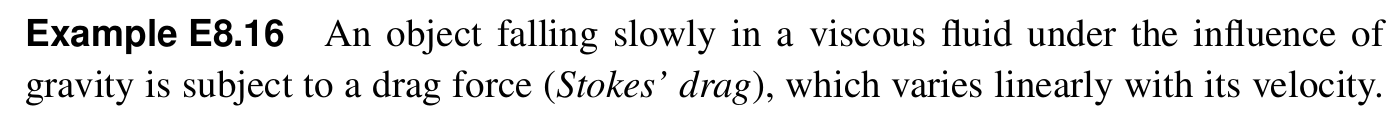

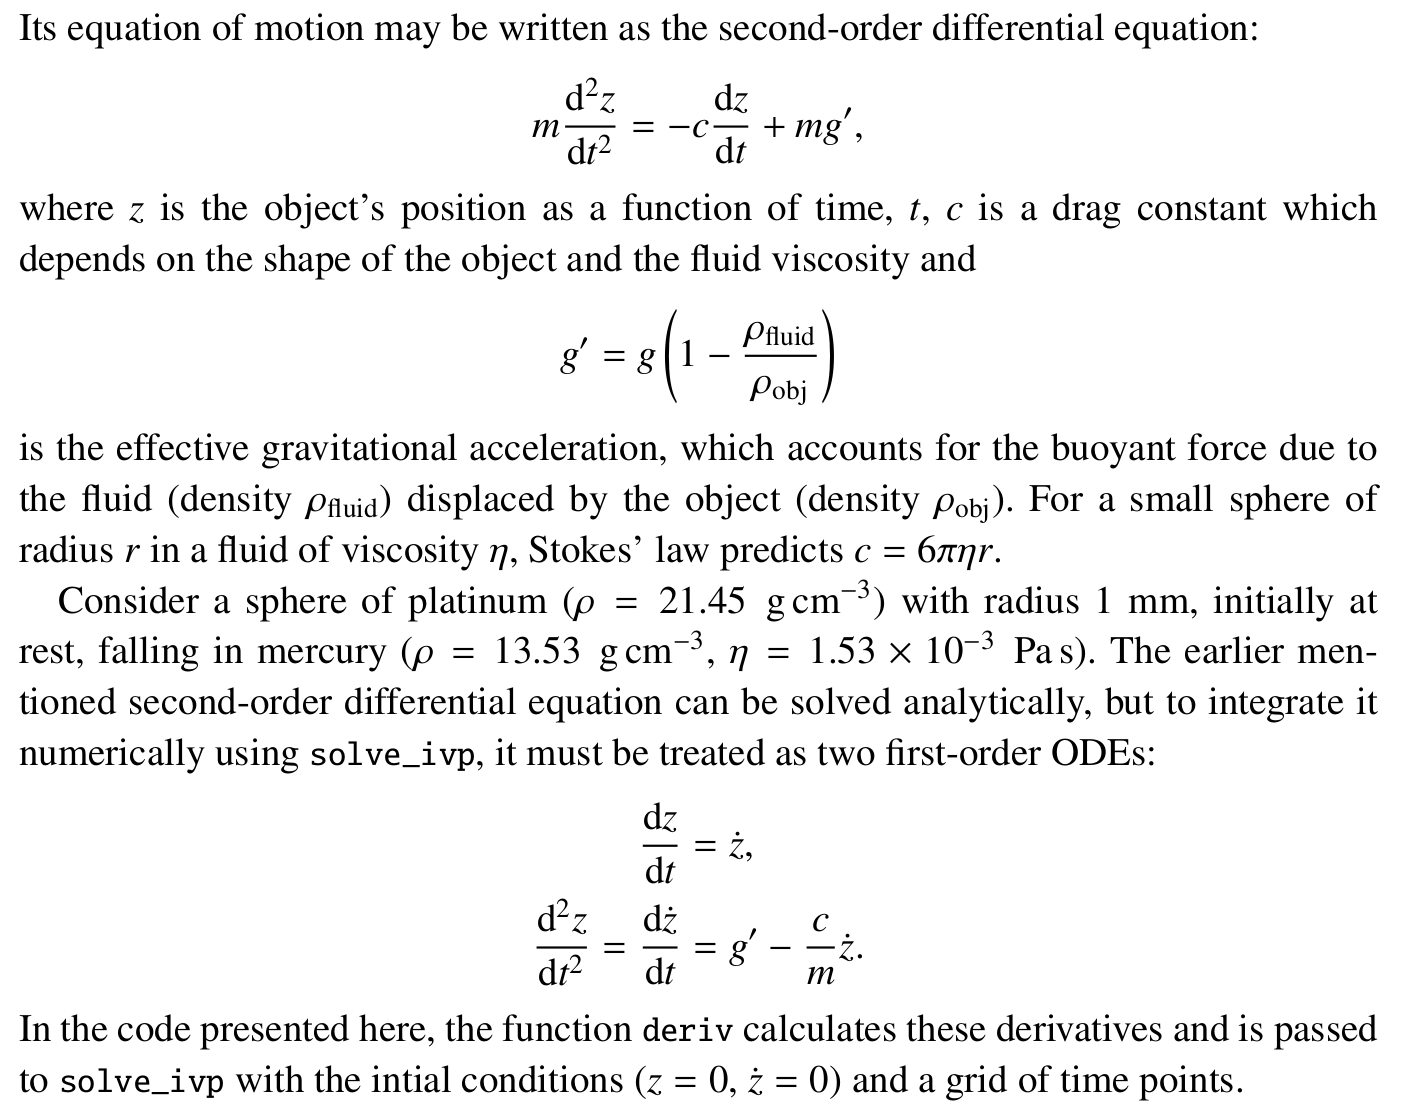

In [ ]:
g = 9.81
# densidades
rho_Pt, rho_Hg = 21450, 13530
# viscosidade
eta = 1.53e-3

r = 1.e-3   # raio
m = 4*np.pi/3 * r**3 * rho_Pt # massa

# constante de arraste
c = 6 * np.pi * eta * r

# g efetivo
gp = g * (1 - rho_Hg/rho_Pt)

In [ ]:
def deriv(t, z):
    z_, zponto = z #z, zponto
    dzponto = gp - c/m * zponto
    return zponto, dzponto

In [ ]:
t0, tf = 0, 20
t = np.linspace(t0, tf, 50)

In [ ]:
#condição inicial: z=0, zponto=0
z0 = (0, 0)

In [ ]:
soln = solve_ivp(deriv, (t0, tf), z0, t_eval=t, dense_output=True)

In [ ]:
z, zponto = soln.sol(t)

In [ ]:
#exata
v0, vt, tau = 0, m*gp/c, m/c

z_exact = vt*t + v0*tau*(1-np.exp(-t/tau)) + vt*tau*(np.exp(-t/tau)-1)
zponto_exact = vt + (v0-vt)*np.exp(-t/tau)

In [ ]:
zponto

array([ 0.        ,  1.38568149,  2.60120549,  3.667574  ,  4.60294738,
        5.42332019,  6.14299705,  6.77475202,  7.32894757,  7.81470152,
        8.2404115 ,  8.61375494,  8.94170691,  9.23010785,  9.48316663,
        9.70475076,  9.89854303, 10.06804144, 10.21655927, 10.34722499,
       10.46270196, 10.56445968, 10.65371684, 10.73169195, 10.79960312,
       10.85866803, 10.91010394, 10.95512765, 10.99495556, 11.03063746,
       11.06240308, 11.09043826, 11.11497495, 11.13627505, 11.15463038,
       11.17036271, 11.18382376, 11.19539517, 11.20548853, 11.21454538,
       11.2229969 , 11.23061716, 11.23732107, 11.24319209, 11.24831383,
       11.25277011, 11.25664491, 11.2600224 , 11.26298692, 11.265623  ])

Text(0, 0.5, 'Velocidade, $v(t)$')

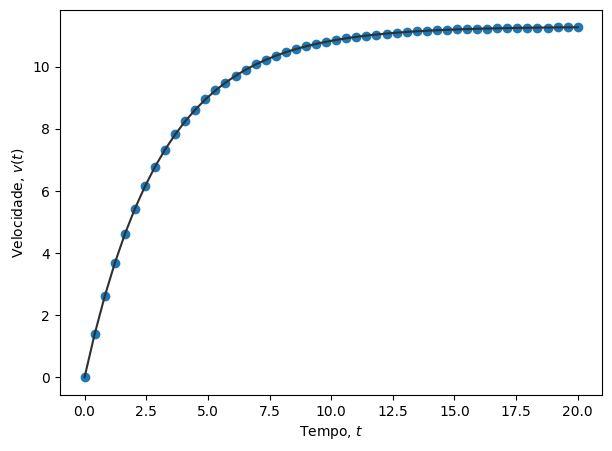

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(t, zponto , 'o', label='Solução numérica')
ax.plot(t, zponto_exact, color='#303030', label ='Solução exata')

ax.set_xlabel("Tempo, $t$")
ax.set_ylabel("Velocidade, $v(t)$")

A função `solve_ivp` pode ser configurada para usar diferentes algoritmos de integração de EDOs. Por padrão, usa-se o método RK45 ou método de [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

Esse método funciona bem para problemas *non-stiff*.

Um problema é dito [*stiff*](https://en.wikipedia.org/wiki/Stiff_equation) quando os passos da solução precisam ser muito pequenos para gerar soluções estáveis. Esse tipo de problema ocorre quando a solução apresenta mudanças de magnitude em múltiplas escalas de tempo. Nesse caso, recomenda-se o uso dos métodos: 'Radau', 'BDF' ou 'LSODA'. Outros métodos são mostrado na tabela abaixo:

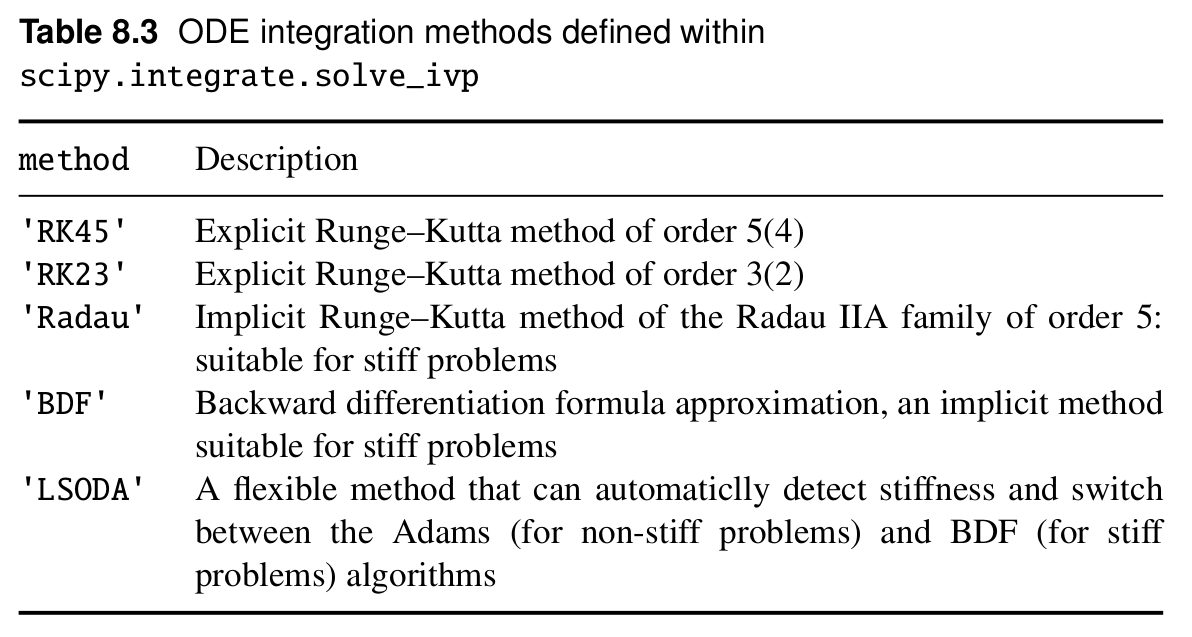

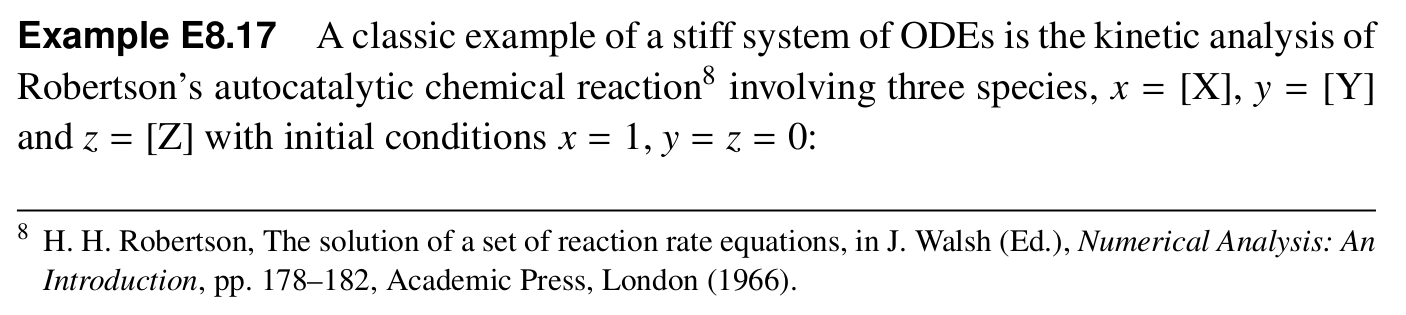

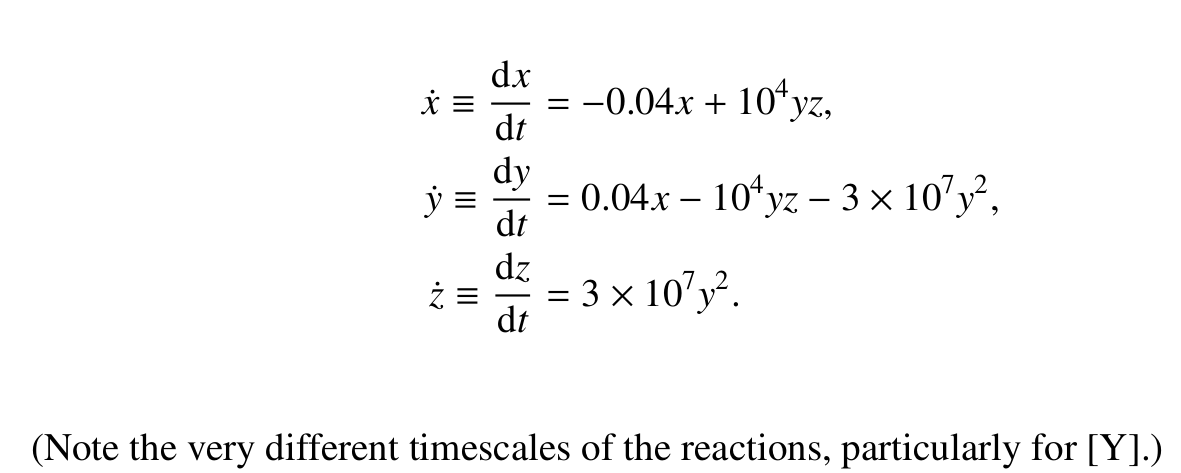

In [ ]:
def deriv(t, y):
    x, y, z = y
    xdot = -0.04 * x + 1.e4 * y * z
    ydot = 0.04 * x - 1.e4 * y * z - 3.e7 * y**2
    zdot = 3.e7 * y**2
    return xdot, ydot, zdot

t0, tf = 0, 500
t = np.linspace(t0, tf,num=1000)
y0 = 1, 0, 0


In [ ]:
soln = solve_ivp(deriv, (t0, tf), y0, dense_output=True, t_eval=t)
x,y,z = soln.sol(t)

(0.0, 10.0)

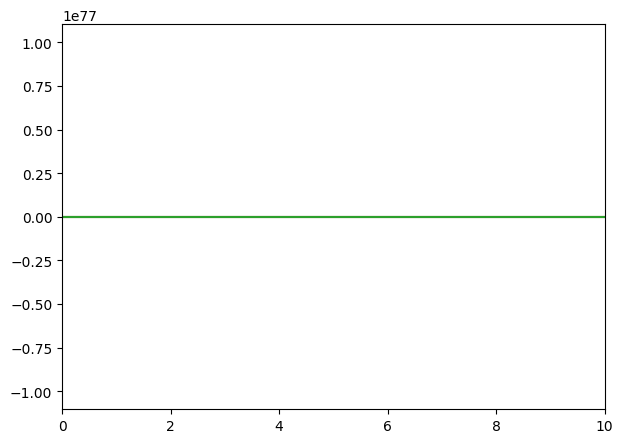

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(t, x, label='x(t)')
ax.plot(t, y, label='y(t)')
ax.plot(t, z, label='z(t)')

ax.set_xlim(0,10)


In [ ]:
soln = solve_ivp(deriv, (t0, tf), y0, dense_output=True, t_eval=t,
                 method='Radau')
x,y,z = soln.sol(t)

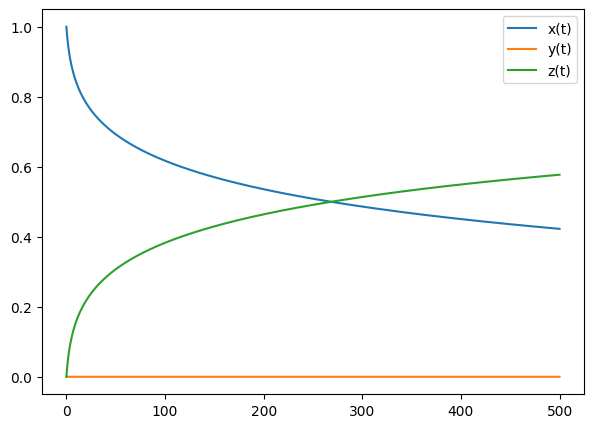

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(t, x, label='x(t)')
ax.plot(t, y, label='y(t)')
ax.plot(t, z, label='z(t)')
ax.legend()

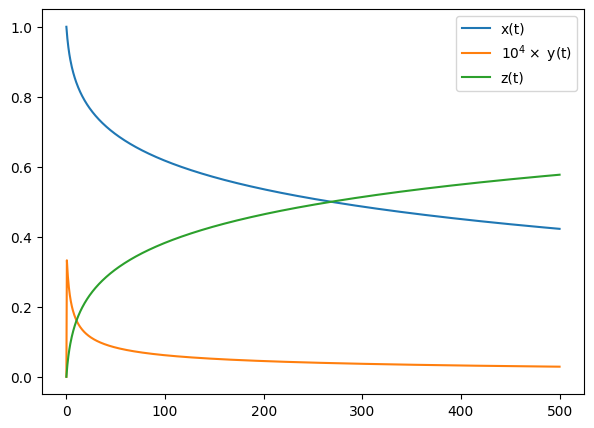

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(t, x, label='x(t)')
ax.plot(t, 1e4*y, label=r'$10^4\times$ y(t)')
ax.plot(t, z, label='z(t)')

ax.legend()

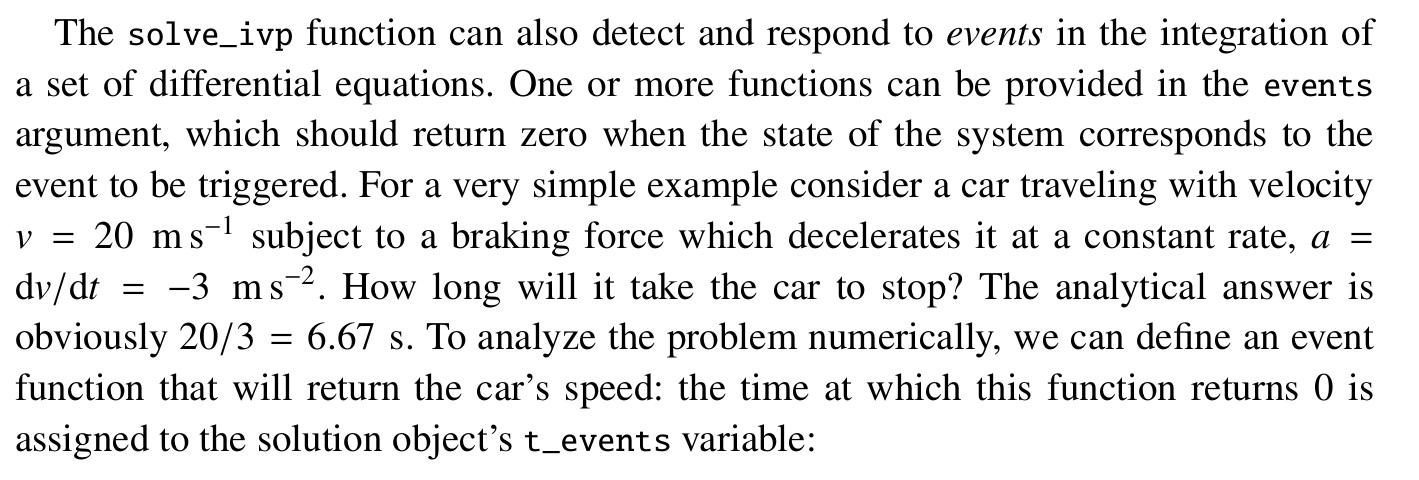

In [ ]:
def car_stopped(t, y):
    return y[0] #quando v=0, retorna 0

t0, tf = 0, 100
v0 = 20

solve_ivp(lambda t, y: -3, (t0, tf), [v0], events=car_stopped)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.461e-01  1.608e+00  1.622e+01  1.000e+02]
        y: [[ 2.000e+01  1.956e+01  1.518e+01 -2.867e+01 -2.800e+02]]
      sol: None
 t_events: [array([ 6.667e+00])]
 y_events: [array([[-1.776e-15]])]
     nfev: 26
     njev: 0
      nlu: 0

Para interromper a solução após o evento, fazemos:

In [ ]:
car_stopped.terminal = True
solve_ivp(lambda t, y: -3, (t0, tf), [v0], events=car_stopped)

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.461e-01  1.608e+00  6.667e+00]
        y: [[ 2.000e+01  1.956e+01  1.518e+01 -1.776e-15]]
      sol: None
 t_events: [array([ 6.667e+00])]
 y_events: [array([[-1.776e-15]])]
     nfev: 20
     njev: 0
      nlu: 0

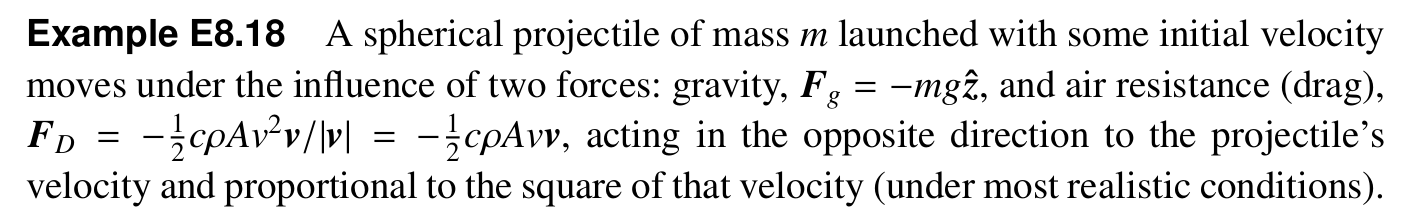

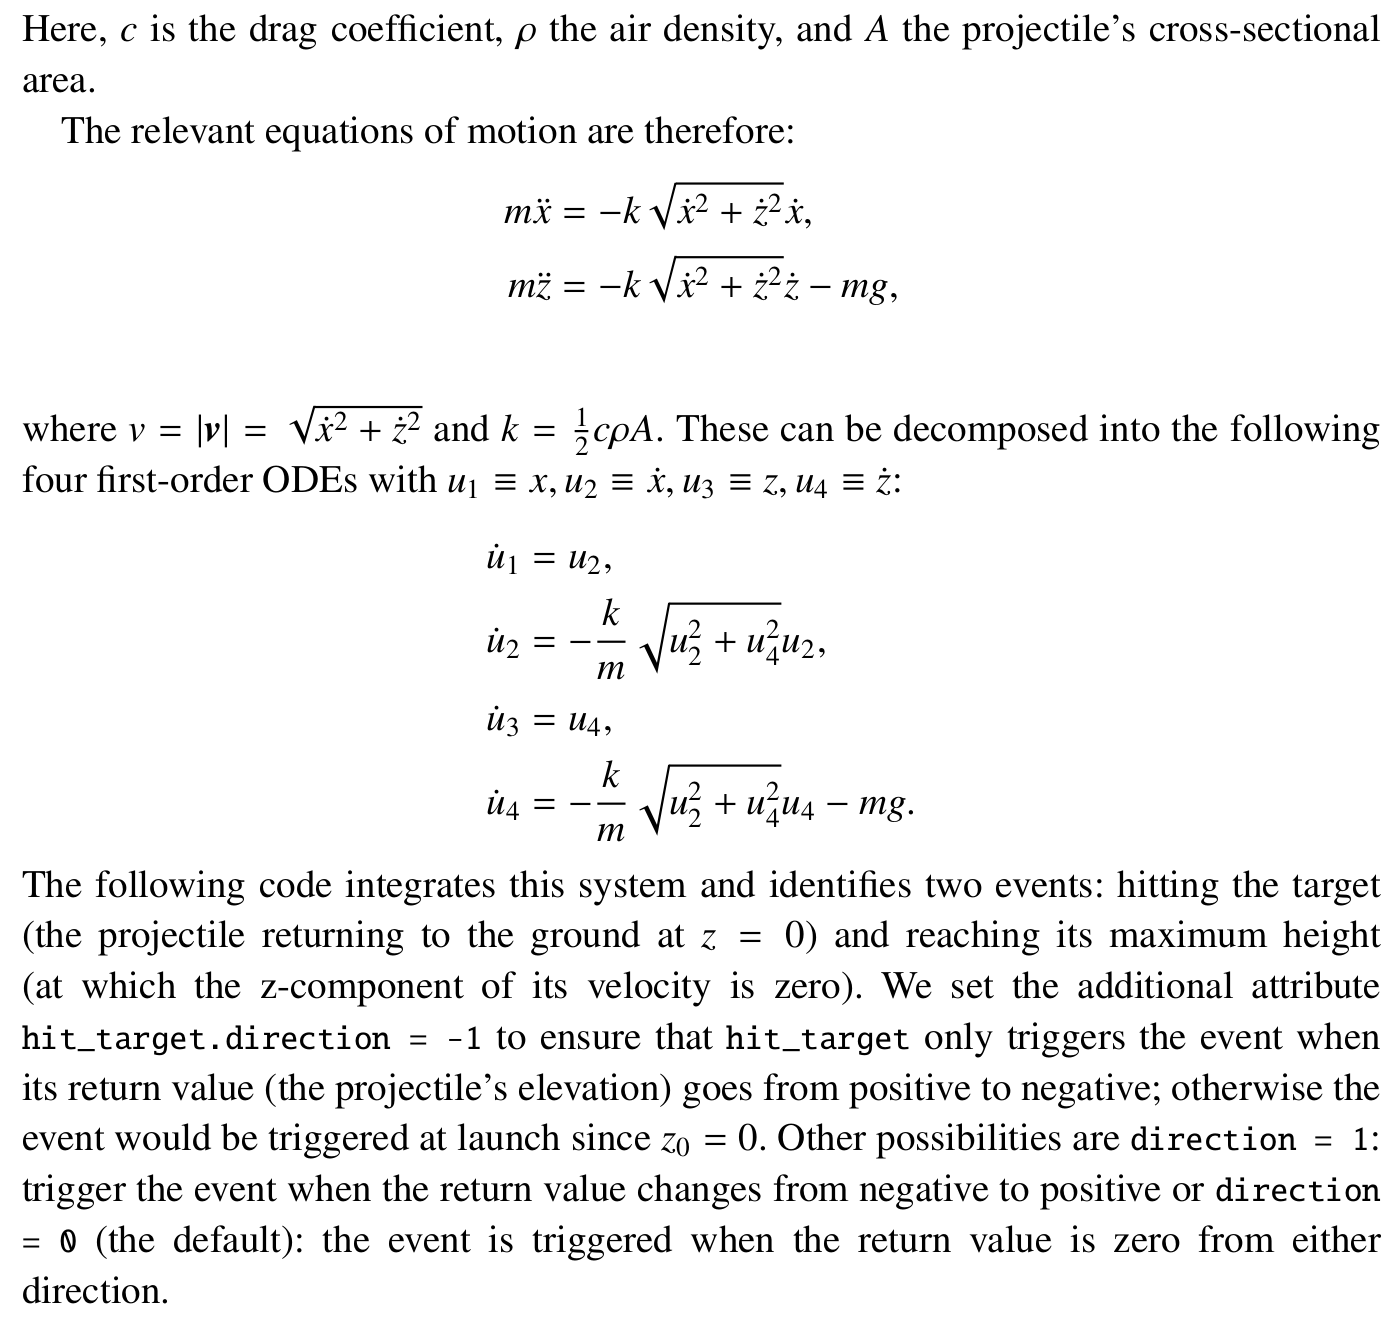

In [ ]:
c = 0.47 #coeficiente de arraste
r = 0.05 #raio
A = np.pi * r**2 #área
m = 0.2 #massa


rho_air = 1.28 #densidade do ar
g = 9.81

k = 0.5 * c * rho_air * A

# condição inicial
v0 = 50
phi0 = np.radians(65)

# condição inicial: x0, v0_x, z0, v0_z.
u0 = 0, v0 * np.cos(phi0), 0., v0 * np.sin(phi0)

# tempos
t0, tf = 0, 50

In [ ]:
def deriv(t, u):
    x, xdot, z, zdot = u
    speed = np.hypot(xdot, zdot)
    xdotdot = -k/m * speed * xdot
    zdotdot = -k/m * speed * zdot - g
    return xdot, xdotdot, zdot, zdotdot

In [ ]:
def hit_target(t, u):
    # u[2] é z, z=0 o projétil aterrizou
    return u[2]

hit_target.terminal = True
hit_target.direction = -1

def max_height(t, u):
    # u[3] é dz/dt=vz, vz=0 o projétil está na altura máxima
    return u[3]

In [ ]:
soln = solve_ivp(deriv, (t0, tf), u0, dense_output=True,
                 events=(hit_target, max_height))

In [ ]:
soln

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  2.828e-05  3.111e-04  3.139e-03  3.142e-02
             3.143e-01  1.061e+00  2.222e+00  4.159e+00  6.336e+00]
        y: [[ 0.000e+00  5.976e-04 ...  4.979e+01  6.412e+01]
            [ 2.113e+01  2.113e+01 ...  8.240e+00  4.936e+00]
            [ 0.000e+00  1.282e-03 ...  4.082e+01 -1.421e-14]
            [ 4.532e+01  4.531e+01 ... -1.213e+01 -2.363e+01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7df455f887f0>
 t_events: [array([ 6.336e+00]), array([ 2.794e+00])]
 y_events: [array([[ 6.412e+01,  4.936e+00, -1.421e-14, -2.363e+01]]), array([[ 3.734e+01,  9.926e+00,  4.942e+01, -8.882e-16]])]
     nfev: 56
     njev: 0
      nlu: 0

In [ ]:
soln.t_events

[array([6.33623381]), array([2.7939952])]

In [ ]:
soln.y_events

[array([[ 6.41157720e+01,  4.93588825e+00, -1.42108547e-14,
         -2.36334696e+01]]),
 array([[ 3.73418434e+01,  9.92560564e+00,  4.94245420e+01,
         -8.88178420e-16]])]

In [ ]:
t = np.linspace(0, soln.t_events[0][0], 100)

sol = soln.sol(t)
x, z = sol[0], sol[2]
print(f'xmax = {x[-1]:.2f} m')
print(f'zmax = {max(z):.2f} m')

xmax = 64.12 m
zmax = 49.42 m


Text(0, 0.5, 'z')

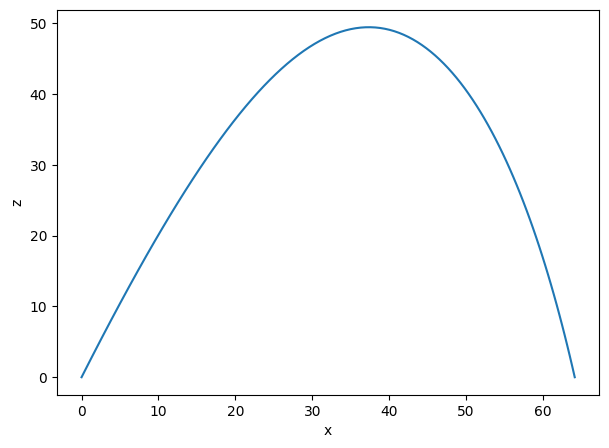

In [ ]:
f, ax = plt.subplots(figsize=(7,5))

ax.plot(x, z)
ax.set_xlabel('x')
ax.set_ylabel('z')

Text(0, 0.5, 'z')

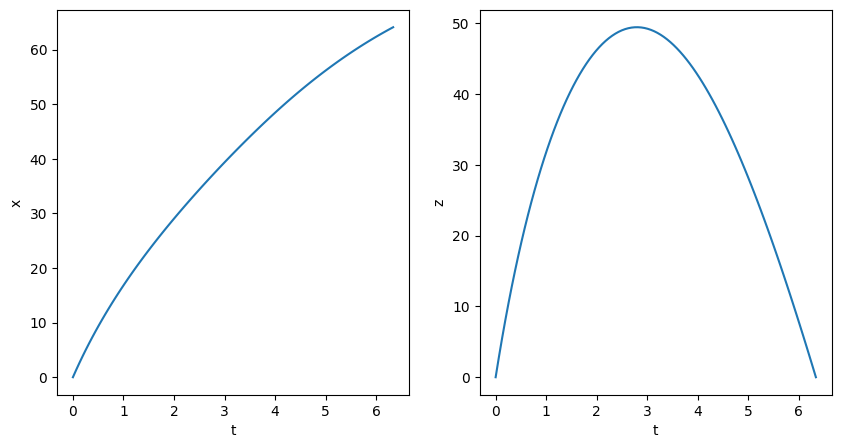

In [ ]:
f, ax = plt.subplots(ncols=2, figsize=(10,5))

ax[0].plot(t,x)
ax[0].set_xlabel('t')
ax[0].set_ylabel('x')

ax[1].plot(t,z)
ax[1].set_xlabel('t')
ax[1].set_ylabel('z')